In [ ]:
pip install prophet

**import libary**

In [ ]:
import pandas as pd
from prophet import Prophet
import numpy as np
from sklearn.metrics import mean_squared_error

# data 

In [ ]:
df = pd.read_csv('Sale.csv')
df

,Altis,Civic,Yaris & Ativ,City & jazz,Yaris Ativ,Yaris,City,jazz,Date,City(neg),Altis(pos),Civic(pos),Yaris(pos),City(pos),Altis(neg),Civic(neg),Yaris(neg)
0,1639,2133,4274,4239,2217,2057,2319,1920,2018-01-01,5,10,14,18,9,10,4,2
1,1885,2063,4699,4299,2523,2176,2362,1937,2018-02-01,4,12,10,14,9,9,6,1
2,1762,2421,5815,4606,3096,2719,2616,1990,2018-03-01,3,11,12,17,10,6,4,5
3,1405,2513,5692,4790,2931,2761,2746,2044,2018-04-01,2,9,10,13,12,9,3,3
4,1908,2486,5881,4879,3164,2717,2863,2016,2018-05-01,5,15,13,15,14,4,2,4
5,2558,2413,6051,5581,3109,2942,3175,2406,2018-06-01,4,18,14,17,15,6,6,6
6,2415,2306,5119,4820,3051,2068,2679,2141,2018-07-01,7,17,12,12,14,7,7,1
7,1798,2368,6544,5123,3338,3206,2814,2309,2018-08-01,8,12,13,18,9,8,8,2
8,2071,2438,6141,5003,3145,2996,2838,2165,2018-09-01,2,16,11,11,13,9,3,3
9,1624,2440,6356,5649,3181,3212,2893,2260,2018-10-01,9,8,15,10,9,4,5,4


# ***Altis***

**data prep**

In [ ]:
altis = df[['Date', 'Altis']]
altis.dropna(inplace = True)
altis.columns = ['ds', 'y']
altis

/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


,ds,y
0,2018-01-01,1639
1,2018-02-01,1885
2,2018-03-01,1762
3,2018-04-01,1405
4,2018-05-01,1908
5,2018-06-01,2558
6,2018-07-01,2415
7,2018-08-01,1798
8,2018-09-01,2071
9,2018-10-01,1624


**train model**

In [ ]:
model = Prophet()
model.fit(altis)


**Add Regressor**

In [ ]:
model_new.add_regressor('Altis(pos)')
model_new.add_regressor('Altis(neg)')

**forecast**

In [ ]:
future = model.make_future_dataframe(periods=12, freq = 'M')
future.tail(12)

,ds
58,2022-10-31
59,2022-11-30
60,2022-12-31
61,2023-01-31
62,2023-02-28
63,2023-03-31
64,2023-04-30
65,2023-05-31
66,2023-06-30
67,2023-07-31


In [ ]:
# Python
forecast = model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]


,ds,yhat,yhat_lower,yhat_upper
0,2018-01-01,1764.968482,1378.136614,2145.734527
1,2018-02-01,1816.002429,1441.320655,2183.875373
2,2018-03-01,1813.031419,1417.126272,2233.451965
3,2018-04-01,1480.107757,1099.636696,1855.855607
4,2018-05-01,1642.749574,1237.636346,2017.349655
...,...,...,...,...
65,2023-05-31,42.121503,-362.014533,415.849208
66,2023-06-30,-500.620310,-889.001031,-113.338181
67,2023-07-31,-1192.963878,-1567.817005,-781.034387
68,2023-08-31,1431.811556,1063.050636,1823.419218


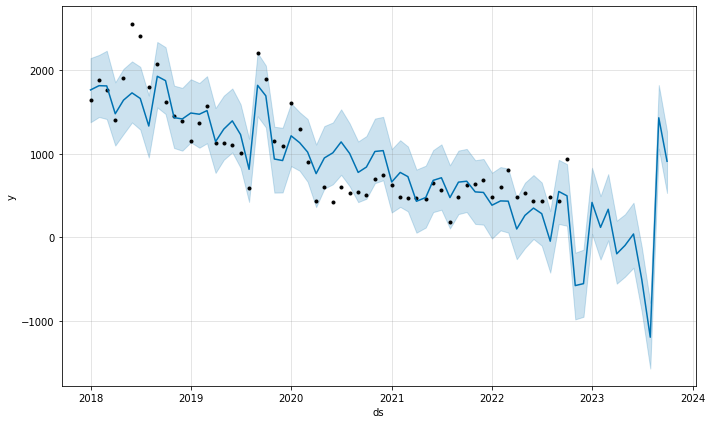

In [ ]:
# Python
fig1 = model.plot(forecast)


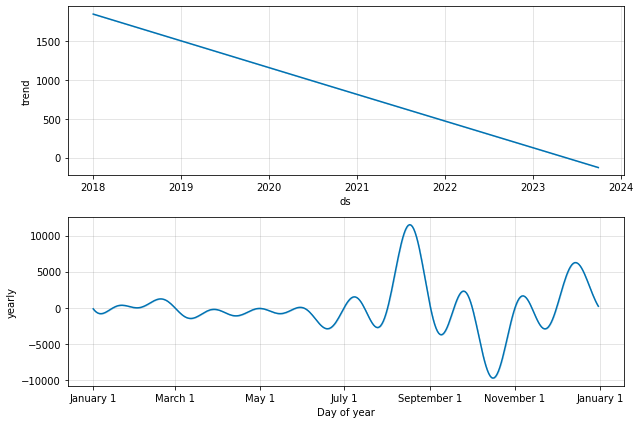

In [ ]:
fig2 = model.plot_components(forecast)


**Evaluation Model**


In [ ]:
import pandas as pd
cutoffs = pd.date_range(start='2019-01-01', end='2020-06-01', freq='2MS')
print(cutoffs)

DatetimeIndex(['2019-01-01', '2019-03-01', '2019-05-01', '2019-07-01',
               '2019-09-01', '2019-11-01', '2020-01-01', '2020-03-01',
               '2020-05-01'],
              dtype='datetime64[ns]', freq='2MS')


In [ ]:
from prophet.diagnostics import cross_validation
df_cv = cross_validation(model=model, horizon='90 days', cutoffs=cutoffs)

In [ ]:
df_cv.head()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2019-02-01,3609.617307,3609.486160,3609.748450,1366,2019-01-01
1,2019-03-01,-830.078445,-830.499348,-829.624368,1575,2019-01-01
2,2019-04-01,1901.296385,1900.484427,1902.138850,1132,2019-01-01
3,2019-04-01,637.346218,633.546888,641.179004,1132,2019-03-01
4,2019-05-01,2003.116201,1991.125246,2015.484080,1133,2019-03-01


In [ ]:
from prophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p


,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,30 days,4.794574e+06,2189.651474,1832.799262,1.546312,1.546312,1.143382,0.000000
1,31 days,3.233499e+06,1798.193219,1558.941889,1.966027,1.642472,1.221164,0.000000
2,59 days,5.784402e+06,2405.078445,2405.078445,1.527034,1.527034,2.000000,0.000000
3,60 days,1.191758e+05,345.218534,345.218534,0.383150,0.383150,0.473947,0.000000
4,61 days,8.057035e+05,897.609856,785.574703,0.820441,0.706373,0.840391,0.166667
5,62 days,5.937246e+03,77.053524,77.053524,0.034929,0.034929,0.035550,0.000000
6,90 days,5.918169e+05,769.296385,769.296385,0.679590,0.679590,0.507235,0.000000
